## **MEDICAL INVENTORY OPTIMIZATION**

The goal of creating a pharmaceutical forecasting model is to lessen the likelihood that there will be a medicine shortage. It entails gathering and examining past sales information to spot trends and patterns in the demand for drugs. We created a forecasting algorithm that estimates the demand for medical supplies based on the data analysis. Data collection on inventory levels, consumption trends, and other pertinent variables will be part of the project. To find patterns and trends in supply and demand, this data will be examined.





In [ ]:
# Import all the necessary packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Loading the Data set

data = pd.read_csv ("/content/Medical.csv")

In [ ]:
data.head()

,Typeofsales,Patient_ID,Specialisation,Dept,Dateofbill,Quantity,ReturnQuantity,Final_Cost,Final_Sales,RtnMRP,Formulation,DrugName,SubCat,SubCat1
0,Sale,12018098765,Specialisation6,Department1,6-1-2022,1,0,55.406,59.260,0.0,Form1,ZINC ACETATE 20MG/5ML SYP,SYRUP & SUSPENSION,VITAMINS & MINERALS
1,Sale,12018103897,Specialisation7,Department1,7/23/2022,1,0,768.638,950.800,0.0,Form1,CEFTAZIDIME 2GM+AVIBACTAM 500MG,INJECTIONS,ANTI-INFECTIVES
2,Sale,12018101123,Specialisation2,Department3,6/23/2022,1,0,774.266,4004.214,0.0,Form2,EPTIFIBATIDE 0.75MG/ML,INJECTIONS,CARDIOVASCULAR & HEMATOPOIETIC SYSTEM
3,Sale,12018079281,Specialisation40,Department1,3/17/2022,2,0,40.798,81.044,0.0,Form1,WATER FOR INJECTION 10ML SOLUTION,INJECTIONS,INTRAVENOUS & OTHER STERILE SOLUTIONS
4,Sale,12018117928,Specialisation5,Department1,12/21/2022,1,0,40.434,40.504,0.0,Form1,LORAZEPAM 1MG,TABLETS & CAPSULES,CENTRAL NERVOUS SYSTEM


In [ ]:
data.tail()

,Typeofsales,Patient_ID,Specialisation,Dept,Dateofbill,Quantity,ReturnQuantity,Final_Cost,Final_Sales,RtnMRP,Formulation,DrugName,SubCat,SubCat1
14213,Sale,12018099994,Specialisation39,Department1,6/19/2022,3,0,61.436,145.200,0.0,Form1,SODIUM CHLORIDE IVF 100ML,"IV FLUIDS, ELECTROLYTES, TPN",INTRAVENOUS & OTHER STERILE SOLUTIONS
14214,Sale,12018047025,Specialisation4,Department1,2/24/2022,2,0,64.448,119.692,0.0,Form1,PIPERACILLIN 1GM + TAZOBACTAM 125MG,INJECTIONS,ANTI-INFECTIVES
14215,Sale,12018017139,Specialisation1,Department1,6/27/2022,4,0,74.944,642.040,0.0,Form1,PARACETAMOL 1GM IV INJ,INJECTIONS,CENTRAL NERVOUS SYSTEM
14216,Sale,12018044140,Specialisation20,Department1,7/30/2022,1,0,111.680,181.000,0.0,Form3,MEROPENEM 1GM INJ,INJECTIONS,ANTI-INFECTIVES
14217,Sale,12018116820,Specialisation26,Department1,10/24/2022,3,0,46.182,133.800,0.0,Form1,TRAMADOL,INJECTIONS,CENTRAL NERVOUS SYSTEM


**Data Information :**

Typeofsale :- Several transaction kinds, like "Sale" and "Return." It offers information on the type of transaction.

Patient_ID :- A distinct identity for every sufferer. This can assist in monitoring the preferences and actions of specific patients.

Specialisation :- Represents the healthcare professional's specialism (e.g., Specialization1) that is related to the transaction. This may have an impact on the kinds of medications administered and the trends in sales.

Dept :-  Identifies the hospital or pharmacy department (e.g., Department 1) where the transaction took place.This can include background information about the transaction's location and context.

Dateofbill :- The transaction date (YYYY:MM:DD). The purpose of time-related data is to create seasonality, trends, and temporal patterns in drug sales.

Quantity :- The amount of medication sold during a specific transaction. This has a direct bearing on the amount of sales.

ReturnQuantity :- The amount of medication came back. It offers information on bounce rate.

Final_cost :- The price of the medication in a deal. This aids in figuring out each sale's financial component.

Final_Sales :- The entire amount of money sold during a transaction. It's used to determine revenue.

RtnMRP :- The drug that was returned and its Maximum Retail Price (MRP). Analyzing returns and pricing strategies calls for consideration of this.

Formulation :- Shows the medication's formulation (Form1, Patent, etc.). Sales may be impacted, depending on the formulation type.

DrugName :- The brand of medication being offered for sale. This gives particular details on the goods being handled.

SubCat  :- A classification of the medications into subcategories. It can be useful to combine medications with comparable properties.

SubCat1 :- Drugs are categorized into secondary subcategories, which may offer a more thorough classification.


In [ ]:
# Let's check the dimension of the dataset

data.shape

(14218, 14)

There are 14 columns and 14218 rows.

In [ ]:
data.columns

Index(['Typeofsales', 'Patient_ID', 'Specialisation', 'Dept', 'Dateofbill',
       'Quantity', 'ReturnQuantity', 'Final_Cost', 'Final_Sales', 'RtnMRP',
       'Formulation', 'DrugName', 'SubCat', 'SubCat1'],
      dtype='object')

## **DETECTING DUPLICATES AND HANDILING**

In [ ]:
duplicate = data.duplicated()
sum(duplicate)



26

In [ ]:
# Remove duplicates
data = data.drop_duplicates()
duplicate = data.duplicated()
sum(duplicate)

0

## **MISSING VALUE DETECTION AND TREATMENT**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14192 entries, 0 to 14217
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Typeofsales     14192 non-null  object 
 1   Patient_ID      14192 non-null  int64  
 2   Specialisation  14192 non-null  object 
 3   Dept            14192 non-null  object 
 4   Dateofbill      14192 non-null  object 
 5   Quantity        14192 non-null  int64  
 6   ReturnQuantity  14192 non-null  int64  
 7   Final_Cost      14192 non-null  float64
 8   Final_Sales     14192 non-null  float64
 9   RtnMRP          14192 non-null  float64
 10  Formulation     13542 non-null  object 
 11  DrugName        12533 non-null  object 
 12  SubCat          12533 non-null  object 
 13  SubCat1         12510 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 1.6+ MB


In [ ]:
data.isnull().any()

Typeofsales       False
Patient_ID        False
Specialisation    False
Dept              False
Dateofbill        False
Quantity          False
ReturnQuantity    False
Final_Cost        False
Final_Sales       False
RtnMRP            False
Formulation        True
DrugName           True
SubCat             True
SubCat1            True
dtype: bool

There are null values in the columns Formulation, DrugName, SubCat, and SubCat1.

In [ ]:
data.isnull().sum()

Typeofsales          0
Patient_ID           0
Specialisation       0
Dept                 0
Dateofbill           0
Quantity             0
ReturnQuantity       0
Final_Cost           0
Final_Sales          0
RtnMRP               0
Formulation        650
DrugName          1659
SubCat            1659
SubCat1           1682
dtype: int64

In [ ]:
# Suppress Warnings

import warnings
warnings.filterwarnings("ignore")

In Python, warnings module provides a way to handle warnings. The filterwarnings() method can be used to ignore warnings.This will ignore all warnings in the code that follows it

In [ ]:
data.replace('', pd.NA, inplace=True)

In [ ]:
group_cols = ['Typeofsales', 'Specialisation', 'Dept']

This will group the DataFrame 'data' by the columns Typeofsales, Specialisation, and Dept. You can then apply an aggregation function to the grouped data, such as sum(), mean(), or count(), to get the desired result.

## **IMPUTATION** (MODE)

Imputation is a technique used for replacing the missing data with some substitute value to retain most of the data/information of the dataset. These techniques are used because removing the data from the dataset every time is not feasible and can lead to a reduction in the size of the dataset to a large extend, which not only raises concerns for biasing the dataset but also leads to incorrect analysis.

In [ ]:
# Impute missing values in Formulation column based on the mode of the group

for col in ['Formulation', 'DrugName', 'SubCat', 'SubCat1']:
    data[col] = data.groupby(group_cols)[col].apply(
        lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)

In [ ]:
data.isnull().sum()

Typeofsales       0
Patient_ID        0
Specialisation    0
Dept              0
Dateofbill        0
Quantity          0
ReturnQuantity    0
Final_Cost        0
Final_Sales       0
RtnMRP            0
Formulation       3
DrugName          6
SubCat            6
SubCat1           6
dtype: int64

There are still missing values in the dataset. Compared to the original dataset, it is little. Rows can be removed without affecting the data in any way.

In [ ]:
# Drop missing value

data.dropna(inplace = True)

In [ ]:
# Reset the index number of the dataset

data = data.reset_index(drop = True )

In [ ]:
data.isnull().sum()

Typeofsales       0
Patient_ID        0
Specialisation    0
Dept              0
Dateofbill        0
Quantity          0
ReturnQuantity    0
Final_Cost        0
Final_Sales       0
RtnMRP            0
Formulation       0
DrugName          0
SubCat            0
SubCat1           0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14184 entries, 0 to 14183
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Typeofsales     14184 non-null  object 
 1   Patient_ID      14184 non-null  int64  
 2   Specialisation  14184 non-null  object 
 3   Dept            14184 non-null  object 
 4   Dateofbill      14184 non-null  object 
 5   Quantity        14184 non-null  int64  
 6   ReturnQuantity  14184 non-null  int64  
 7   Final_Cost      14184 non-null  float64
 8   Final_Sales     14184 non-null  float64
 9   RtnMRP          14184 non-null  float64
 10  Formulation     14184 non-null  object 
 11  DrugName        14184 non-null  object 
 12  SubCat          14184 non-null  object 
 13  SubCat1         14184 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 1.5+ MB


## **DATA MANIPULATION**

In [ ]:
# Convert "Dateofbill" object type to datetime

data['Dateofbill'] = pd.to_datetime(data['Dateofbill'])

In [ ]:
# Sort dataset by date column in ascending order

data = data.sort_values(by = 'Dateofbill', ascending=True)

In [ ]:
data

,Typeofsales,Patient_ID,Specialisation,Dept,Dateofbill,Quantity,ReturnQuantity,Final_Cost,Final_Sales,RtnMRP,Formulation,DrugName,SubCat,SubCat1
13062,Sale,12018072643,Specialisation11,Department1,2022-01-01,5,0,86.760,304.000,0.0,Form1,PANTOPRAZOLE 40MG INJ,INJECTIONS,INTRAVENOUS & OTHER STERILE SOLUTIONS
2433,Sale,12018080296,Specialisation27,Department1,2022-01-01,3,0,66.208,448.680,0.0,Form1,PARACETAMOL 1GM IV INJ,INJECTIONS,CENTRAL NERVOUS SYSTEM
9895,Sale,12018080633,Specialisation14,Department1,2022-01-01,1,0,77.800,125.586,0.0,Form2,ENOXAPARIN 40MG,INJECTIONS,CARDIOVASCULAR & HEMATOPOIETIC SYSTEM
14140,Sale,12018075045,Specialisation4,Department1,2022-01-01,1,0,47.824,49.780,0.0,Form1,FLUCONAZOLE 50MG TAB,TABLETS & CAPSULES,ANTI-INFECTIVES
3749,Sale,12018081111,Specialisation11,Department2,2022-01-01,1,0,44.928,46.760,0.0,Form1,EPHEDRINE 30MG,INJECTIONS,CARDIOVASCULAR & HEMATOPOIETIC SYSTEM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3696,Sale,12018123429,Specialisation3,Department1,2022-12-31,3,0,52.700,135.876,0.0,Form1,BUDESONIDE 2ML,INHALERS & RESPULES,RESPIRATORY SYSTEM
4762,Sale,12018094153,Specialisation8,Department1,2022-12-31,1,0,43.970,44.972,0.0,Form1,SULPHAMETHOXAZOLE 200MG + TRIMETHOPRIM 40MG,SYRUP & SUSPENSION,ANTI-INFECTIVES
13581,Sale,12018117666,Specialisation20,Department1,2022-12-31,2,0,40.340,81.100,0.0,Form1,ONDANSETRON 2MG/ML,INJECTIONS,INTRAVENOUS & OTHER STERILE SOLUTIONS
6146,Sale,12018117928,Specialisation5,Department1,2022-12-31,1,0,53.682,58.000,0.0,Form1,VITAMIN B12 + FOLIC ACID + IRON HYDROCHLORIDE\...,DROPS,VITAMINS & MINERALS


Decimal numbers can be found in the columns Final_Cost and Final_Sales. We are now rounding the values.

In [ ]:
# Specify number of decimal places to round to 0
decimal_places = 0

# Round the values in the column to 0
data['Final_Cost'] = data['Final_Cost'].apply(
    lambda x: round(x, decimal_places))



In [ ]:
# Specify number of decimal places to round to 0
decimal_places1 = 0

# Round the values in the column to 0
data['Final_Sales'] = data['Final_Sales'].apply(
    lambda x: round(x, decimal_places1))

In [ ]:
data

,Typeofsales,Patient_ID,Specialisation,Dept,Dateofbill,Quantity,ReturnQuantity,Final_Cost,Final_Sales,RtnMRP,Formulation,DrugName,SubCat,SubCat1
13062,Sale,12018072643,Specialisation11,Department1,2022-01-01,5,0,87.0,304.0,0.0,Form1,PANTOPRAZOLE 40MG INJ,INJECTIONS,INTRAVENOUS & OTHER STERILE SOLUTIONS
2433,Sale,12018080296,Specialisation27,Department1,2022-01-01,3,0,66.0,449.0,0.0,Form1,PARACETAMOL 1GM IV INJ,INJECTIONS,CENTRAL NERVOUS SYSTEM
9895,Sale,12018080633,Specialisation14,Department1,2022-01-01,1,0,78.0,126.0,0.0,Form2,ENOXAPARIN 40MG,INJECTIONS,CARDIOVASCULAR & HEMATOPOIETIC SYSTEM
14140,Sale,12018075045,Specialisation4,Department1,2022-01-01,1,0,48.0,50.0,0.0,Form1,FLUCONAZOLE 50MG TAB,TABLETS & CAPSULES,ANTI-INFECTIVES
3749,Sale,12018081111,Specialisation11,Department2,2022-01-01,1,0,45.0,47.0,0.0,Form1,EPHEDRINE 30MG,INJECTIONS,CARDIOVASCULAR & HEMATOPOIETIC SYSTEM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3696,Sale,12018123429,Specialisation3,Department1,2022-12-31,3,0,53.0,136.0,0.0,Form1,BUDESONIDE 2ML,INHALERS & RESPULES,RESPIRATORY SYSTEM
4762,Sale,12018094153,Specialisation8,Department1,2022-12-31,1,0,44.0,45.0,0.0,Form1,SULPHAMETHOXAZOLE 200MG + TRIMETHOPRIM 40MG,SYRUP & SUSPENSION,ANTI-INFECTIVES
13581,Sale,12018117666,Specialisation20,Department1,2022-12-31,2,0,40.0,81.0,0.0,Form1,ONDANSETRON 2MG/ML,INJECTIONS,INTRAVENOUS & OTHER STERILE SOLUTIONS
6146,Sale,12018117928,Specialisation5,Department1,2022-12-31,1,0,54.0,58.0,0.0,Form1,VITAMIN B12 + FOLIC ACID + IRON HYDROCHLORIDE\...,DROPS,VITAMINS & MINERALS


In [ ]:
from numpy import NaN
data['ReturnQuantity'] = data['ReturnQuantity'].replace(0,np.nan)

In [ ]:
data['ReturnQuantity'].describe

<bound method NDFrame.describe of 13062   NaN
2433    NaN
9895    NaN
14140   NaN
3749    NaN
         ..
3696    NaN
4762    NaN
13581   NaN
6146    NaN
13616   NaN
Name: ReturnQuantity, Length: 14184, dtype: float64>

Since 13062 of the 14184 data points are NaN, we can remove the column.

In [ ]:
data2 = data[['Typeofsales','SubCat','Dateofbill','ReturnQuantity']]
data2

,Typeofsales,SubCat,Dateofbill,ReturnQuantity
13062,Sale,INJECTIONS,2022-01-01,NaN
2433,Sale,INJECTIONS,2022-01-01,NaN
9895,Sale,INJECTIONS,2022-01-01,NaN
14140,Sale,TABLETS & CAPSULES,2022-01-01,NaN
3749,Sale,INJECTIONS,2022-01-01,NaN
...,...,...,...,...
3696,Sale,INHALERS & RESPULES,2022-12-31,NaN
4762,Sale,SYRUP & SUSPENSION,2022-12-31,NaN
13581,Sale,INJECTIONS,2022-12-31,NaN
6146,Sale,DROPS,2022-12-31,NaN


In [ ]:
data.drop('ReturnQuantity', axis=1, inplace=True)

In [ ]:
data

,Typeofsales,Patient_ID,Specialisation,Dept,Dateofbill,Quantity,Final_Cost,Final_Sales,RtnMRP,Formulation,DrugName,SubCat,SubCat1
13062,Sale,12018072643,Specialisation11,Department1,2022-01-01,5,87.0,304.0,0.0,Form1,PANTOPRAZOLE 40MG INJ,INJECTIONS,INTRAVENOUS & OTHER STERILE SOLUTIONS
2433,Sale,12018080296,Specialisation27,Department1,2022-01-01,3,66.0,449.0,0.0,Form1,PARACETAMOL 1GM IV INJ,INJECTIONS,CENTRAL NERVOUS SYSTEM
9895,Sale,12018080633,Specialisation14,Department1,2022-01-01,1,78.0,126.0,0.0,Form2,ENOXAPARIN 40MG,INJECTIONS,CARDIOVASCULAR & HEMATOPOIETIC SYSTEM
14140,Sale,12018075045,Specialisation4,Department1,2022-01-01,1,48.0,50.0,0.0,Form1,FLUCONAZOLE 50MG TAB,TABLETS & CAPSULES,ANTI-INFECTIVES
3749,Sale,12018081111,Specialisation11,Department2,2022-01-01,1,45.0,47.0,0.0,Form1,EPHEDRINE 30MG,INJECTIONS,CARDIOVASCULAR & HEMATOPOIETIC SYSTEM
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3696,Sale,12018123429,Specialisation3,Department1,2022-12-31,3,53.0,136.0,0.0,Form1,BUDESONIDE 2ML,INHALERS & RESPULES,RESPIRATORY SYSTEM
4762,Sale,12018094153,Specialisation8,Department1,2022-12-31,1,44.0,45.0,0.0,Form1,SULPHAMETHOXAZOLE 200MG + TRIMETHOPRIM 40MG,SYRUP & SUSPENSION,ANTI-INFECTIVES
13581,Sale,12018117666,Specialisation20,Department1,2022-12-31,2,40.0,81.0,0.0,Form1,ONDANSETRON 2MG/ML,INJECTIONS,INTRAVENOUS & OTHER STERILE SOLUTIONS
6146,Sale,12018117928,Specialisation5,Department1,2022-12-31,1,54.0,58.0,0.0,Form1,VITAMIN B12 + FOLIC ACID + IRON HYDROCHLORIDE\...,DROPS,VITAMINS & MINERALS


## **DESCRIBE DATA**

In [ ]:
data.describe()

,Patient_ID,Quantity,Final_Cost,Final_Sales,RtnMRP
count,1.418400e+04,14184.000000,14184.000000,14184.000000,14184.000000
mean,1.201809e+10,2.234490,124.692400,233.871898,29.144288
std,2.809309e+04,5.137742,465.096326,671.491922,182.462466
min,1.201800e+10,0.000000,40.000000,0.000000,0.000000
25%,1.201808e+10,1.000000,45.000000,48.000000,0.000000
50%,1.201809e+10,1.000000,54.000000,86.000000,0.000000
75%,1.201811e+10,2.000000,78.000000,181.000000,0.000000
max,1.201813e+10,150.000000,33178.000000,39490.000000,8014.000000


# **First Moment Business Decision**

**Measure of Central Tendancy**

In [ ]:
# Mean

data[['Quantity','Final_Cost','Final_Sales','RtnMRP']].mean()

Quantity         2.234490
Final_Cost     124.692400
Final_Sales    233.871898
RtnMRP          29.144288
dtype: float64

In [ ]:
# Median

data[['Quantity','Final_Cost','Final_Sales','RtnMRP']].median()

Quantity        1.0
Final_Cost     54.0
Final_Sales    86.0
RtnMRP          0.0
dtype: float64

In [ ]:
# Mode

data.mode()

,Typeofsales,Patient_ID,Specialisation,Dept,Dateofbill,Quantity,Final_Cost,Final_Sales,RtnMRP,Formulation,DrugName,SubCat,SubCat1
0,Sale,12018071649,Specialisation4,Department1,2022-07-09,1,42.0,0.0,0.0,Form1,MULTIPLE ELECTROLYTES 500ML IVF,INJECTIONS,INTRAVENOUS & OTHER STERILE SOLUTIONS


# **Second Moment Business Decision**

**Measure of Dispersion**

In [ ]:
# Variance

data[['Quantity','Final_Cost','Final_Sales','RtnMRP']].var()

Quantity           26.396396
Final_Cost     216314.592184
Final_Sales    450901.400990
RtnMRP          33292.551496
dtype: float64

In [ ]:
# Standard Deviation

print(data.std())

Patient_ID                     28093.09263
Dateofbill     104 days 11:56:23.006383184
Quantity                          5.137742
Final_Cost                      465.096326
Final_Sales                     671.491922
RtnMRP                          182.462466
dtype: object


# **Third Moment Business Decision**

**Skewness**

In [ ]:
data.skew()

Patient_ID     -1.365236
Quantity       11.328894
Final_Cost     34.519563
Final_Sales    21.032940
RtnMRP         15.783219
dtype: float64

# **Fourth Moment Business Decision**

**Kurtosis**

In [ ]:
data.kurt()

Patient_ID        1.619381
Quantity        179.755564
Final_Cost     2025.283421
Final_Sales     949.513510
RtnMRP          402.708686
dtype: float64

# **EDA**

In [ ]:
data.Quantity.max()

150

(array([1.3761e+04, 2.4800e+02, 8.0000e+01, 1.8000e+01, 1.1000e+01,
        4.7000e+01, 3.0000e+00, 5.0000e+00, 0.0000e+00, 2.0000e+00,
        8.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        110., 120., 130., 140., 150.]),
 <BarContainer object of 15 artists>)

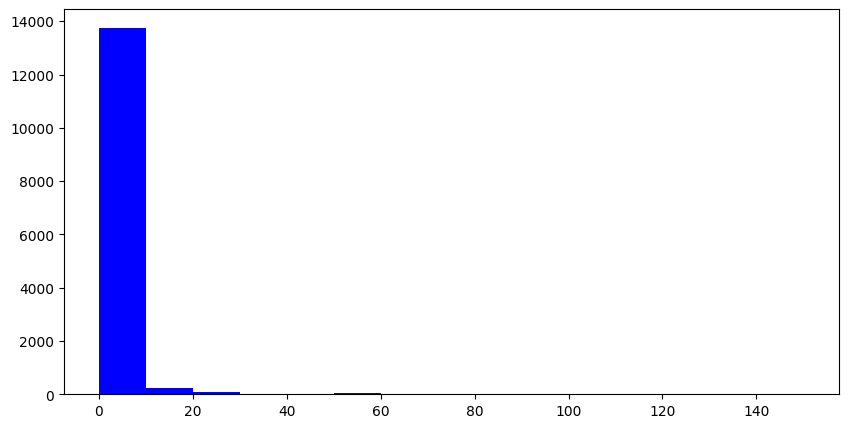

In [ ]:
plt.hist(data.Quantity, color = 'blue', bins = 15, alpha = 1)


In [ ]:
data.Final_Cost.max()

33178.0

(0.0, 3500.0)

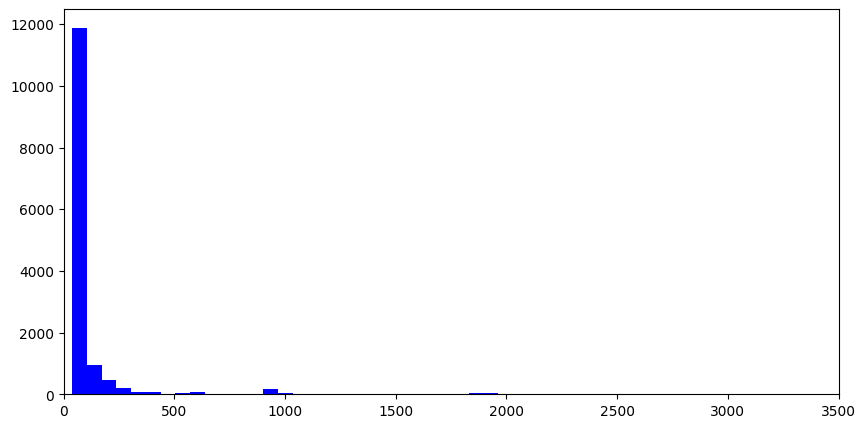

In [ ]:
plt.hist(data.Final_Cost, color = 'blue', bins = 500, alpha = 1)
plt.xlim(0,3500)

In [ ]:
data.Final_Sales.max()

39490.0

(0.0, 4000.0)

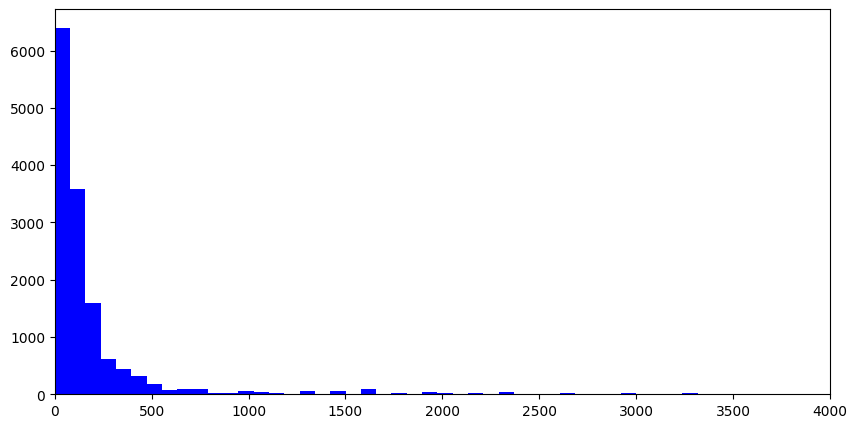

In [ ]:
plt.hist(data.Final_Sales, color = 'blue', bins = 500, alpha = 1)
plt.xlim(0,4000)

In a positively skewed distribution, the mean is greater than the median as the data is more towards the lower side and the mean average of all the values.

In [ ]:
data.RtnMRP.max()

8014.0

(0.0, 1000.0)

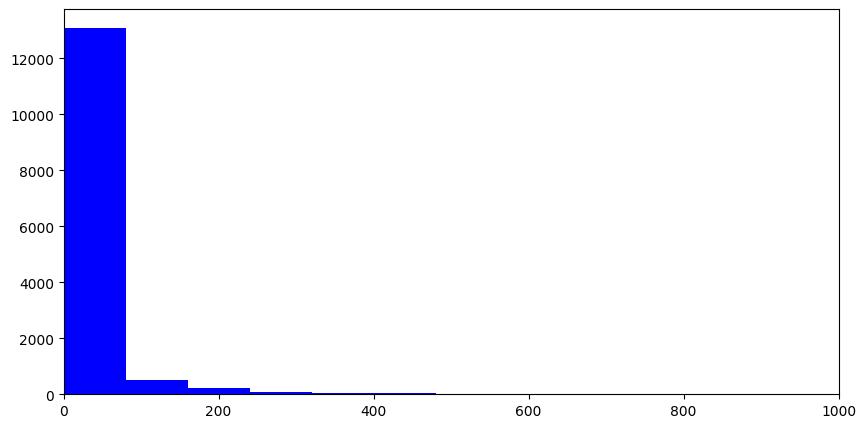

In [ ]:
plt.hist(data.RtnMRP, color = 'blue', bins = 100, alpha = 1)
plt.xlim(0,1000)

In [ ]:
# Convert date formate to month

data['Dateofbill'] = pd.to_datetime(data['Dateofbill'])
data['Dateofbill'] = data['Dateofbill'].dt.strftime('%b')

In [ ]:
data.head()

,Typeofsales,Patient_ID,Specialisation,Dept,Dateofbill,Quantity,Final_Cost,Final_Sales,RtnMRP,Formulation,DrugName,SubCat,SubCat1
13062,Sale,12018072643,Specialisation11,Department1,Jan,5,87.0,304.0,0.0,Form1,PANTOPRAZOLE 40MG INJ,INJECTIONS,INTRAVENOUS & OTHER STERILE SOLUTIONS
2433,Sale,12018080296,Specialisation27,Department1,Jan,3,66.0,449.0,0.0,Form1,PARACETAMOL 1GM IV INJ,INJECTIONS,CENTRAL NERVOUS SYSTEM
9895,Sale,12018080633,Specialisation14,Department1,Jan,1,78.0,126.0,0.0,Form2,ENOXAPARIN 40MG,INJECTIONS,CARDIOVASCULAR & HEMATOPOIETIC SYSTEM
14140,Sale,12018075045,Specialisation4,Department1,Jan,1,48.0,50.0,0.0,Form1,FLUCONAZOLE 50MG TAB,TABLETS & CAPSULES,ANTI-INFECTIVES
3749,Sale,12018081111,Specialisation11,Department2,Jan,1,45.0,47.0,0.0,Form1,EPHEDRINE 30MG,INJECTIONS,CARDIOVASCULAR & HEMATOPOIETIC SYSTEM


In [ ]:
# Pivot the DataFrame based on SubCat of drugs

data_pivoted = data.pivot_table(index="SubCat", columns="Dateofbill", values="Quantity")



In [ ]:
data_pivoted

Dateofbill,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
SubCat,,,,,,,,,,,,
DROPS,0.888889,0.666667,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.666667,1.000000,1.000000,0.857143
INHALERS & RESPULES,2.360000,2.977778,2.722222,2.935484,3.666667,3.159091,3.266667,3.137931,4.052632,2.954545,3.088889,3.068182
INJECTIONS,2.782361,2.464607,2.405502,2.540490,2.329768,2.762735,2.283019,2.757296,2.577532,2.510760,2.634218,2.444142
"IV FLUIDS, ELECTROLYTES, TPN",1.869231,1.678445,1.592437,1.813636,1.942708,1.839844,2.050228,1.732218,1.706767,1.485207,1.622951,1.505376
LIQUIDS & SOLUTIONS,5.714286,6.300000,9.161290,4.294118,11.086957,4.666667,1.050000,11.375000,9.461538,13.400000,6.650000,1.095238
LOTIONS,NaN,1.000000,1.000000,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN
NUTRITIONAL SUPPLEMENTS,1.000000,1.000000,1.000000,0.909091,0.833333,1.000000,1.000000,0.846154,0.866667,1.000000,0.888889,0.875000
"OINTMENTS, CREAMS & GELS",1.000000,1.151515,1.064516,1.115385,1.125000,1.057143,1.136364,1.031250,0.870968,1.095238,1.129032,1.192308
PATCH,1.000000,NaN,0.500000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000


# **Data Distribution**

((array([-3.89614943, -3.67566244, -3.55482318, ...,  3.55482318,
          3.67566244,  3.89614943]),
  array([  0,   0,   0, ..., 100, 100, 150])),
 (2.660232114547923, 2.234489565707839, 0.5176655056900049))

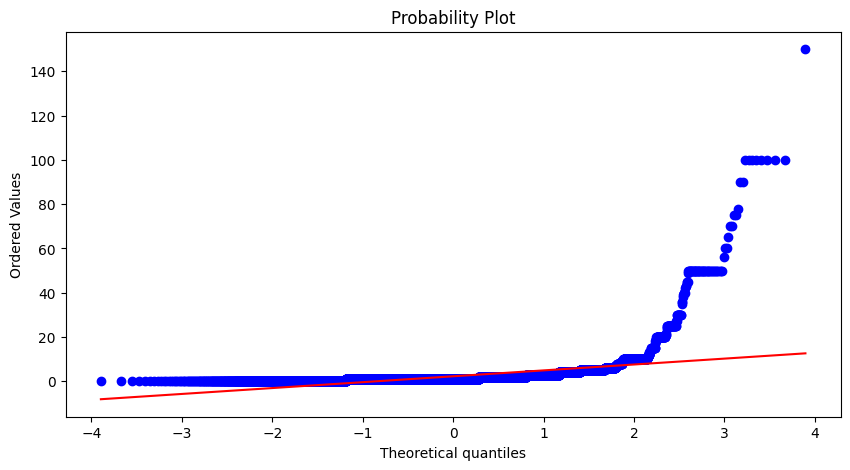

In [ ]:
# Distribution of data

import pylab
import scipy.stats as stats
stats.probplot(data.Quantity, dist="norm", plot=pylab)

The Quantity data shows it is not normally distributed because the data is not falling within the straight line

# **Data Transformation : Log Transformation**

((array([-3.89614943, -3.67566244, -3.55482318, ...,  3.55482318,
          3.67566244,  3.89614943]),
  array([      -inf,       -inf,       -inf, ..., 4.60517019, 4.60517019,
         5.01063529])),
 (nan, nan, nan))

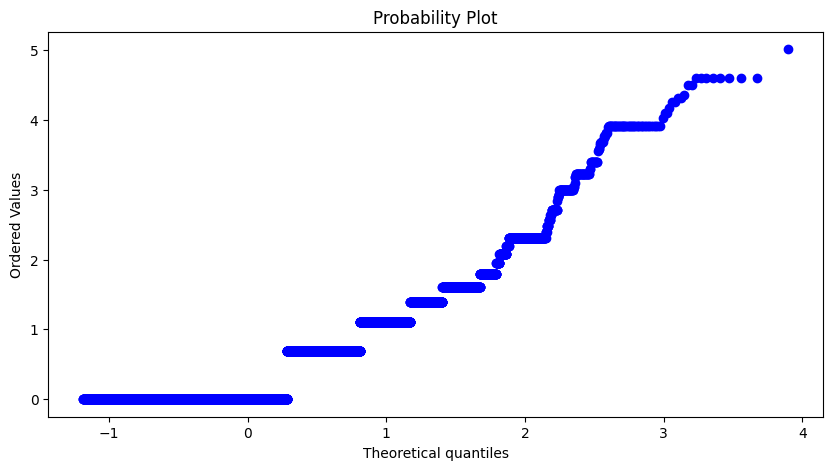

In [ ]:
# Transform the data to a normal distribution

stats.probplot(np.log(data.Quantity),dist="norm",plot=pylab)

After log transformation, the data is normally distributed

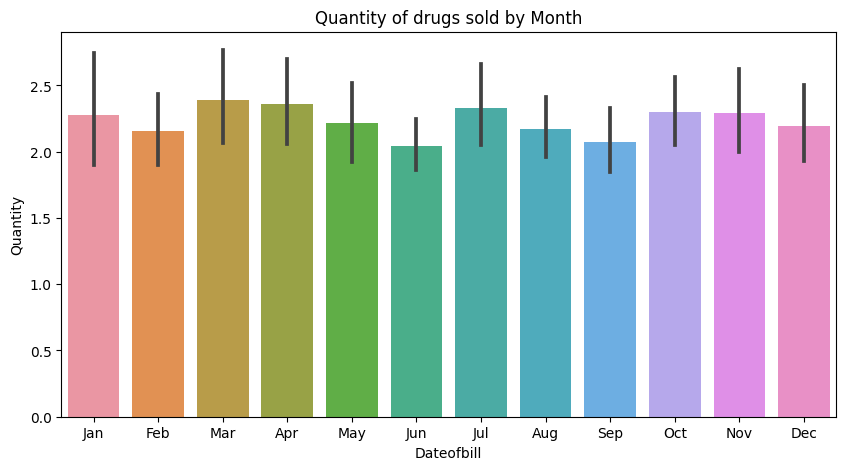

In [ ]:
sns.barplot(data = data, x = 'Dateofbill', y = 'Quantity')
plt.title('Quantity of drugs sold by Month')
plt.show()

This bar diagram shows that the highest quantity sold is in March, April, July, October, and November.

# **Trend in Quantity**

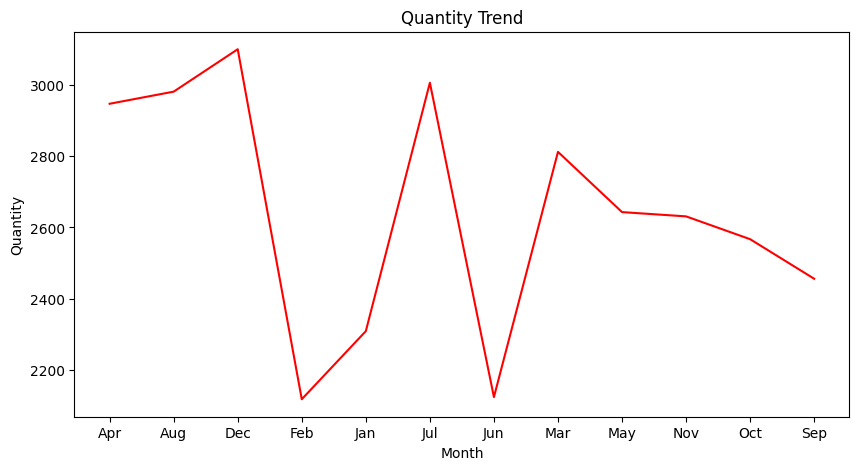

In [ ]:
Month = data.groupby('Dateofbill')['Quantity'].sum()
plt.plot(Month.index, Month.values, color = 'red')
plt.title('Quantity Trend')
plt.xlabel('Month')
plt.ylabel('Quantity')

plt.show()

December has the highest quantity of medicines sold while February and June is the lowest.

In [ ]:
df_grouped = data[['Dateofbill','Quantity']]

In [ ]:
# Group by Quantity and Month

df_grouped = df_grouped.groupby('Dateofbill').sum()


In [ ]:
df_grouped = df_grouped.reset_index()
df_grouped

,Dateofbill,Quantity
0,Apr,2947
1,Aug,2981
2,Dec,3100
3,Feb,2118
4,Jan,2309
5,Jul,3006
6,Jun,2124
7,Mar,2812
8,May,2643
9,Nov,2631


In [ ]:
# Create dictionary to map month names into numerical values

month = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
              'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

# Create a new column with the numerical values of the months
df_grouped['Monthindex'] = df_grouped['Dateofbill'].map(month)

df_grouped = df_grouped.sort_values(by = 'Monthindex')

In [ ]:
# Drop Monthindex column

df_grouped = df_grouped.drop(columns=['Monthindex'])
df_grouped = df_grouped.reset_index(drop=True)
df_grouped

,Dateofbill,Quantity
0,Jan,2309
1,Feb,2118
2,Mar,2812
3,Apr,2947
4,May,2643
5,Jun,2124
6,Jul,3006
7,Aug,2981
8,Sep,2456
9,Oct,2567


# **One-Hot Encoding**

In [ ]:
data1 = pd.get_dummies(df_grouped.Dateofbill)
data1.columns

Index(['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov',
       'Oct', 'Sep'],
      dtype='object')

In [ ]:
df = pd.concat([df_grouped , data1] , axis = 1)
df

,Dateofbill,Quantity,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,Jan,2309,0,0,0,0,1,0,0,0,0,0,0,0
1,Feb,2118,0,0,0,1,0,0,0,0,0,0,0,0
2,Mar,2812,0,0,0,0,0,0,0,1,0,0,0,0
3,Apr,2947,1,0,0,0,0,0,0,0,0,0,0,0
4,May,2643,0,0,0,0,0,0,0,0,1,0,0,0
5,Jun,2124,0,0,0,0,0,0,1,0,0,0,0,0
6,Jul,3006,0,0,0,0,0,1,0,0,0,0,0,0
7,Aug,2981,0,1,0,0,0,0,0,0,0,0,0,0
8,Sep,2456,0,0,0,0,0,0,0,0,0,0,0,1
9,Oct,2567,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
df.drop('Dateofbill', axis=1, inplace = True)


In [ ]:
df

,Quantity,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,2309,0,0,0,0,1,0,0,0,0,0,0,0
1,2118,0,0,0,1,0,0,0,0,0,0,0,0
2,2812,0,0,0,0,0,0,0,1,0,0,0,0
3,2947,1,0,0,0,0,0,0,0,0,0,0,0
4,2643,0,0,0,0,0,0,0,0,1,0,0,0
5,2124,0,0,0,0,0,0,1,0,0,0,0,0
6,3006,0,0,0,0,0,1,0,0,0,0,0,0
7,2981,0,1,0,0,0,0,0,0,0,0,0,0
8,2456,0,0,0,0,0,0,0,0,0,0,0,1
9,2567,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
df.drop('Quantity', axis=1, inplace = True)

**Multicollinearity**

In [ ]:
from sklearn import preprocessing
import statsmodels.api as sm

In [ ]:
def call_vif(data):
  vif_df = pd.DataFrame(columns = ['var','vif'])

  x_var_name = data.columns

  for i in range(0, x_var_name.shape[0]):
    y = data[x_var_name[i]]
    x = data[x_var_name.drop([x_var_name[i]])]
    r_sqr = sm.OLS(y,x).fit().rsquared
    vif = round (1/(1-r_sqr),2)
    vif_df.loc[i] = [x_var_name[i],vif]
  return vif_df.sort_values(by = 'vif',axis =0, ascending = False, inplace =False)

call_vif(df)

,var,vif
0,Apr,1.0
1,Aug,1.0
2,Dec,1.0
3,Feb,1.0
4,Jan,1.0
5,Jul,1.0
6,Jun,1.0
7,Mar,1.0
8,May,1.0
9,Nov,1.0


# **Random Forest & Linear Regression Model**

In [ ]:
df1 = df_grouped
df1

,Dateofbill,Quantity
0,Jan,2309
1,Feb,2118
2,Mar,2812
3,Apr,2947
4,May,2643
5,Jun,2124
6,Jul,3006
7,Aug,2981
8,Sep,2456
9,Oct,2567


In [ ]:
df1.set_index('Dateofbill')

,Quantity
Dateofbill,
Jan,2309
Feb,2118
Mar,2812
Apr,2947
May,2643
Jun,2124
Jul,3006
Aug,2981
Sep,2456


<Axes: >

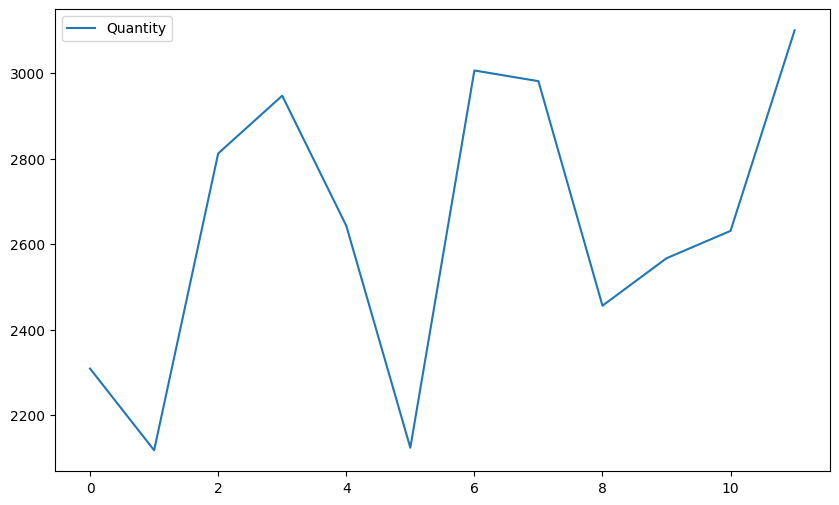

In [ ]:
df1.plot (figsize = (10,6))

In [ ]:
df1['Quantity_LastMonth'] = df1['Quantity'].shift(+1)
df1['Quantity_2Monthsback'] = df1['Quantity'].shift(+2)
df1['Quantity_3Monthsback'] = df1['Quantity'].shift(+3)
df1

,Dateofbill,Quantity,Quantity_LastMonth,Quantity_2Monthsback,Quantity_3Monthsback
0,Jan,2309,NaN,NaN,NaN
1,Feb,2118,2309.0,NaN,NaN
2,Mar,2812,2118.0,2309.0,NaN
3,Apr,2947,2812.0,2118.0,2309.0
4,May,2643,2947.0,2812.0,2118.0
5,Jun,2124,2643.0,2947.0,2812.0
6,Jul,3006,2124.0,2643.0,2947.0
7,Aug,2981,3006.0,2124.0,2643.0
8,Sep,2456,2981.0,3006.0,2124.0
9,Oct,2567,2456.0,2981.0,3006.0


In [ ]:
df1 = df1.dropna()
df1

,Dateofbill,Quantity,Quantity_LastMonth,Quantity_2Monthsback,Quantity_3Monthsback
3,Apr,2947,2812.0,2118.0,2309.0
4,May,2643,2947.0,2812.0,2118.0
5,Jun,2124,2643.0,2947.0,2812.0
6,Jul,3006,2124.0,2643.0,2947.0
7,Aug,2981,3006.0,2124.0,2643.0
8,Sep,2456,2981.0,3006.0,2124.0
9,Oct,2567,2456.0,2981.0,3006.0
10,Nov,2631,2567.0,2456.0,2981.0
11,Dec,3100,2631.0,2567.0,2456.0


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


In [ ]:
x1,x2,x3,y = df1['Quantity_LastMonth'], df1['Quantity_2Monthsback'], df1['Quantity_3Monthsback'], df1['Quantity']
x1,x2,x3,y = np.array(x1), np.array(x2), np.array(x3), np.array(y)
x1,x2,x3,y = x1.reshape(-1,1), x2.reshape(-1,1), x3.reshape(-1,1), y.reshape(-1,1)
final_x = np.concatenate((x1,x2,x3), axis = 1)
print(final_x)

[[2812. 2118. 2309.]
 [2947. 2812. 2118.]
 [2643. 2947. 2812.]
 [2124. 2643. 2947.]
 [3006. 2124. 2643.]
 [2981. 3006. 2124.]
 [2456. 2981. 3006.]
 [2567. 2456. 2981.]
 [2631. 2567. 2456.]]


In [ ]:
X_train, X_test, Y_train, Y_test = final_x[:], final_x[-10:], y[:], y[-10:]

In [ ]:
lr = LinearRegression()
lr.fit (X_train, Y_train)

LinearRegression()

In [ ]:
regressor = RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)
regressor.fit(X_train,Y_train)

RandomForestRegressor(max_features=3, random_state=1)

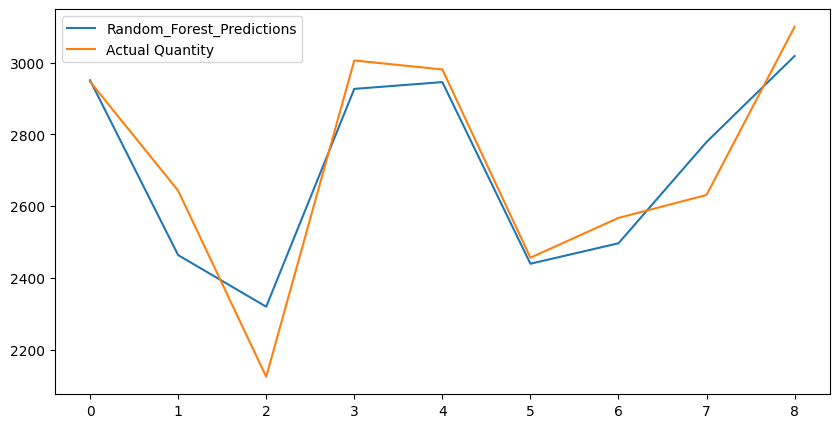

In [ ]:
pred = regressor.predict(X_test)
plt.rcParams["figure.figsize"] = (10, 5)
plt.plot(pred, label='Random_Forest_Predictions')
plt.plot(Y_test, label='Actual Quantity')
plt.legend(loc="upper left")
plt.show()

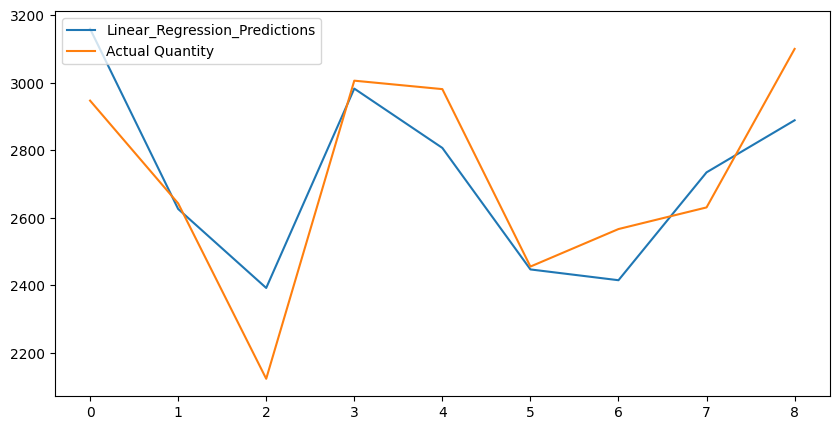

In [ ]:
lin_pred = lr.predict(X_test)
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(lin_pred, label='Linear_Regression_Predictions')
plt.plot(Y_test,label='Actual Quantity')
plt.legend(loc="upper left")
plt.show()

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error

rmse_rf = sqrt(mean_squared_error(pred,Y_test))
rmse_lr = sqrt(mean_squared_error(lin_pred,Y_test))

In [ ]:
print('Mean Squared Error for Random Forest Model is:',rmse_rf)
print('Mean Squared Error for Linear Regression Model is:',rmse_lr)

Mean Squared Error for Random Forest Model is: 111.41388986816473
Mean Squared Error for Linear Regression Model is: 158.76027698565974


The MSE of 111.61 suggests that, on average, the squared differences between the actual and predicted values of
quantity of drugs sold are relatively low. This indicates a relatively good fit of the Random Forest Model to the data.The MSE 159.58 suggests that the average squared differences between the actual and predicted values are
somewhat higher compared to the Random Forest Model. This indicates a higher level of prediction error compared
to the Random Forest Model.

# **BOUNCE RATE**

In [ ]:
data2

,Typeofsales,SubCat,Dateofbill,ReturnQuantity
13062,Sale,INJECTIONS,2022-01-01,NaN
2433,Sale,INJECTIONS,2022-01-01,NaN
9895,Sale,INJECTIONS,2022-01-01,NaN
14140,Sale,TABLETS & CAPSULES,2022-01-01,NaN
3749,Sale,INJECTIONS,2022-01-01,NaN
...,...,...,...,...
3696,Sale,INHALERS & RESPULES,2022-12-31,NaN
4762,Sale,SYRUP & SUSPENSION,2022-12-31,NaN
13581,Sale,INJECTIONS,2022-12-31,NaN
6146,Sale,DROPS,2022-12-31,NaN


In [ ]:
data2.dropna(inplace = True)
data2

,Typeofsales,SubCat,Dateofbill,ReturnQuantity
10879,Return,INJECTIONS,2022-01-01,2.0
10699,Return,INJECTIONS,2022-01-02,1.0
13689,Return,DROPS,2022-01-02,1.0
873,Return,INJECTIONS,2022-01-03,3.0
4750,Return,INJECTIONS,2022-01-03,3.0
...,...,...,...,...
12408,Return,INHALERS & RESPULES,2022-12-29,6.0
11272,Return,"IV FLUIDS, ELECTROLYTES, TPN",2022-12-29,1.0
10098,Return,INJECTIONS,2022-12-29,2.0
4440,Return,INJECTIONS,2022-12-30,1.0


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1673 entries, 10879 to 13492
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Typeofsales     1673 non-null   object        
 1   SubCat          1673 non-null   object        
 2   Dateofbill      1673 non-null   datetime64[ns]
 3   ReturnQuantity  1673 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 65.4+ KB


In [ ]:
data2 = data2.reset_index(drop = True )
data2

,Typeofsales,SubCat,Dateofbill,ReturnQuantity
0,Return,INJECTIONS,2022-01-01,2.0
1,Return,INJECTIONS,2022-01-02,1.0
2,Return,DROPS,2022-01-02,1.0
3,Return,INJECTIONS,2022-01-03,3.0
4,Return,INJECTIONS,2022-01-03,3.0
...,...,...,...,...
1668,Return,INHALERS & RESPULES,2022-12-29,6.0
1669,Return,"IV FLUIDS, ELECTROLYTES, TPN",2022-12-29,1.0
1670,Return,INJECTIONS,2022-12-29,2.0
1671,Return,INJECTIONS,2022-12-30,1.0


In [ ]:
data2['Dateofbill'] = data2['Dateofbill'].dt.strftime('%b')
data2

,Typeofsales,SubCat,Dateofbill,ReturnQuantity
0,Return,INJECTIONS,Jan,2.0
1,Return,INJECTIONS,Jan,1.0
2,Return,DROPS,Jan,1.0
3,Return,INJECTIONS,Jan,3.0
4,Return,INJECTIONS,Jan,3.0
...,...,...,...,...
1668,Return,INHALERS & RESPULES,Dec,6.0
1669,Return,"IV FLUIDS, ELECTROLYTES, TPN",Dec,1.0
1670,Return,INJECTIONS,Dec,2.0
1671,Return,INJECTIONS,Dec,1.0


In [ ]:
data2_pivoted = data2.pivot_table(index="SubCat", columns="Dateofbill", values="ReturnQuantity")
data2_pivoted

Dateofbill,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
SubCat,,,,,,,,,,,,
DROPS,1.000000,1.000000,NaN,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000
INHALERS & RESPULES,4.000000,3.800000,3.833333,2.400000,1.857143,3.333333,3.500000,5.000000,2.750000,2.000000,3.125000,3.000000
INJECTIONS,3.160000,4.153061,2.659091,2.850000,3.593220,2.142857,3.079365,2.970588,3.367347,3.805195,2.301587,2.423077
"IV FLUIDS, ELECTROLYTES, TPN",1.764706,1.763636,1.843750,2.024390,1.758621,1.675676,2.000000,1.659574,1.773585,1.793103,1.351351,1.500000
LIQUIDS & SOLUTIONS,1.333333,1.000000,1.000000,2.000000,1.666667,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000
LOTIONS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
NUTRITIONAL SUPPLEMENTS,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,1.000000,NaN,1.000000,1.000000
"OINTMENTS, CREAMS & GELS",1.000000,1.000000,1.000000,NaN,1.000000,1.000000,NaN,1.000000,1.250000,2.000000,1.000000,NaN
PATCH,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


((array([-3.3431081 , -3.08861505, -2.94725233, ...,  2.94725233,
          3.08861505,  3.3431081 ]),
  array([ 1.,  1.,  1., ..., 50., 50., 50.])),
 (2.4390102359598362, 2.4745965331739397, 0.5813729425068259))

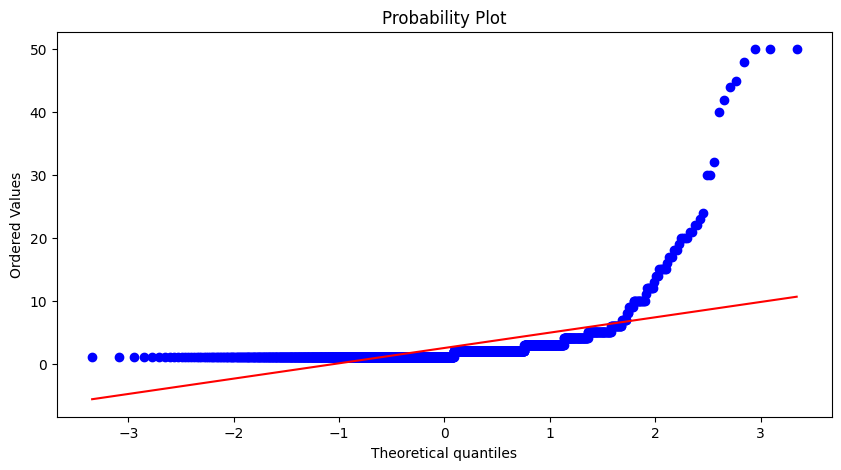

In [ ]:
stats.probplot(data2.ReturnQuantity, dist="norm", plot=pylab)

((array([-3.3431081 , -3.08861505, -2.94725233, ...,  2.94725233,
          3.08861505,  3.3431081 ]),
  array([0.        , 0.        , 0.        , ..., 3.91202301, 3.91202301,
         3.91202301])),
 (0.6086380281308342, 0.5206398935604757, 0.8627889082196271))

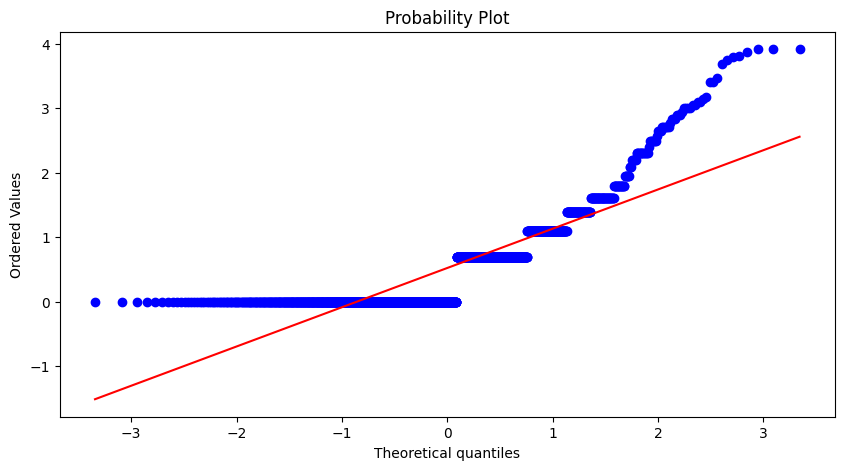

In [ ]:

stats.probplot(np.log(data2.ReturnQuantity),dist="norm",plot=pylab)

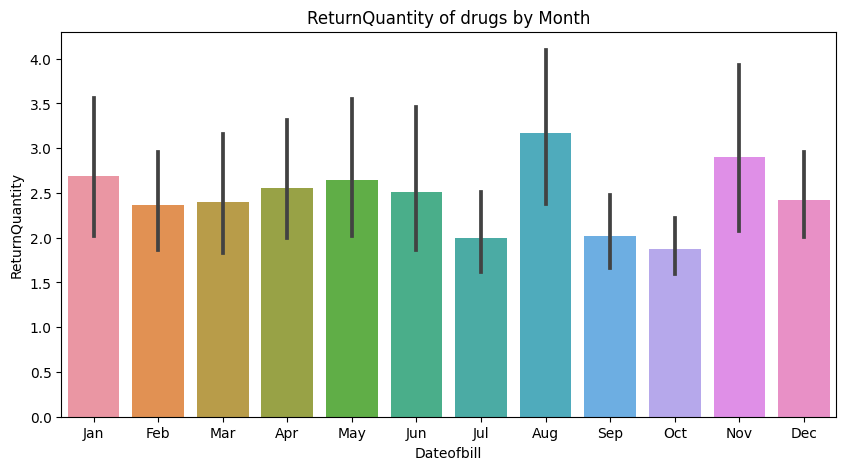

In [ ]:
sns.barplot(data = data2, x = 'Dateofbill', y = 'ReturnQuantity')
plt.title('ReturnQuantity of drugs by Month')
plt.show()

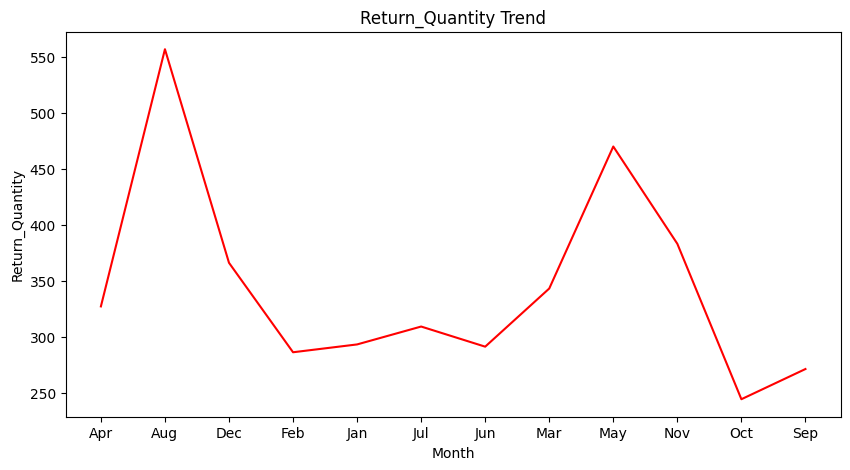

In [ ]:
Month = data2.groupby('Dateofbill')['ReturnQuantity'].sum()
plt.plot(Month.index, Month.values, color = 'red')
plt.title('Return_Quantity Trend')
plt.xlabel('Month')
plt.ylabel('Return_Quantity')

plt.show()

In [ ]:
df_grouped1 = data2[['Dateofbill','ReturnQuantity']]
df_grouped1 = df_grouped1.groupby('Dateofbill').sum()
df_grouped1

,ReturnQuantity
Dateofbill,
Apr,327.0
Aug,557.0
Dec,366.0
Feb,286.0
Jan,293.0
Jul,309.0
Jun,291.0
Mar,343.0
May,470.0


In [ ]:
rq = df_grouped1

In [ ]:
rq['RQuantity_LastMonth'] = rq['ReturnQuantity'].shift(+1)
rq['RQuantity_2Monthsback'] = rq['ReturnQuantity'].shift(+2)
rq['RQuantity_3Monthsback'] = rq['ReturnQuantity'].shift(+3)
rq

,ReturnQuantity,RQuantity_LastMonth,RQuantity_2Monthsback,RQuantity_3Monthsback
Dateofbill,,,,
Apr,327.0,NaN,NaN,NaN
Aug,557.0,327.0,NaN,NaN
Dec,366.0,557.0,327.0,NaN
Feb,286.0,366.0,557.0,327.0
Jan,293.0,286.0,366.0,557.0
Jul,309.0,293.0,286.0,366.0
Jun,291.0,309.0,293.0,286.0
Mar,343.0,291.0,309.0,293.0
May,470.0,343.0,291.0,309.0


In [ ]:
rq = rq.dropna()
rq

,ReturnQuantity,RQuantity_LastMonth,RQuantity_2Monthsback,RQuantity_3Monthsback
Dateofbill,,,,
Feb,286.0,366.0,557.0,327.0
Jan,293.0,286.0,366.0,557.0
Jul,309.0,293.0,286.0,366.0
Jun,291.0,309.0,293.0,286.0
Mar,343.0,291.0,309.0,293.0
May,470.0,343.0,291.0,309.0
Nov,383.0,470.0,343.0,291.0
Oct,244.0,383.0,470.0,343.0
Sep,271.0,244.0,383.0,470.0


In [ ]:
a1,a2,a3,z = rq['RQuantity_LastMonth'], rq['RQuantity_2Monthsback'], rq['RQuantity_3Monthsback'], rq['ReturnQuantity']
a1,a2,a3,z = np.array(a1), np.array(a2), np.array(a3), np.array(z)
a1,a2,a3,z = a1.reshape(-1,1), a2.reshape(-1,1), a3.reshape(-1,1), z.reshape(-1,1)
final_a = np.concatenate((a1,a2,a3), axis = 1)
print(final_a)

[[366. 557. 327.]
 [286. 366. 557.]
 [293. 286. 366.]
 [309. 293. 286.]
 [291. 309. 293.]
 [343. 291. 309.]
 [470. 343. 291.]
 [383. 470. 343.]
 [244. 383. 470.]]


In [ ]:
X_train, X_test, Y_train, Y_test = final_a[:], final_a[-10:], z[:], z[-10:]

In [ ]:
lr = LinearRegression()
lr.fit (X_train, Y_train)

LinearRegression()

In [ ]:
regressor = RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)
regressor.fit(X_train,Y_train)

RandomForestRegressor(max_features=3, random_state=1)

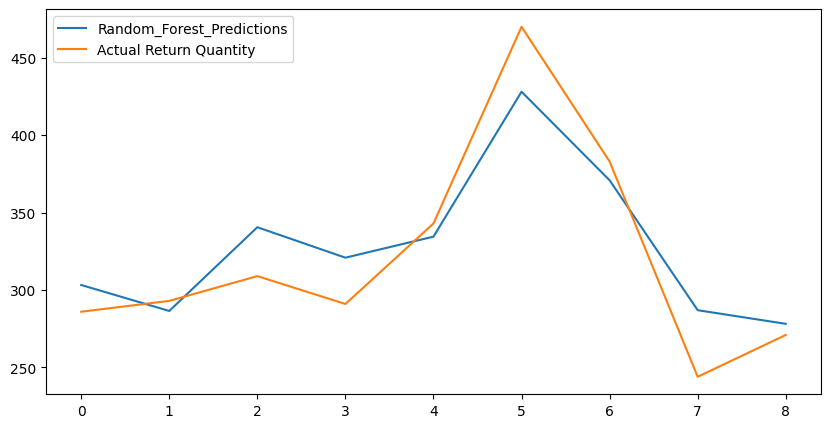

In [ ]:
pred = regressor.predict(X_test)
plt.rcParams["figure.figsize"] = (10, 5)
plt.plot(pred, label='Random_Forest_Predictions')
plt.plot(Y_test, label='Actual Return Quantity')
plt.legend(loc="upper left")
plt.show()

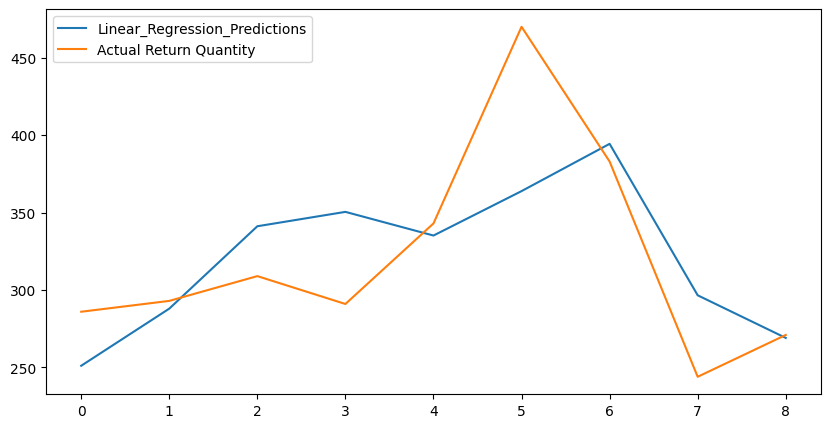

In [ ]:
lin_pred = lr.predict(X_test)
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(lin_pred, label='Linear_Regression_Predictions')
plt.plot(Y_test,label='Actual Return Quantity')
plt.legend(loc="upper left")
plt.show()

In [ ]:
rmse_rf = sqrt(mean_squared_error(pred,Y_test))
rmse_lr = sqrt(mean_squared_error(lin_pred,Y_test))

In [ ]:
print('Mean Squared Error for Random Forest Model is:',rmse_rf)
print('Mean Squared Error for Linear Regression Model is:',rmse_lr)

Mean Squared Error for Random Forest Model is: 26.05301880567564
Mean Squared Error for Linear Regression Model is: 47.18922745200296
